<a href="https://colab.research.google.com/github/kushshah777/MachineLearningAssignment2/blob/master/Architecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt



Using TensorFlow backend.


Initializing Parameters


In [0]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

X_folds = np.array_split(x_train, 5)
print(X_folds[4].shape)
y_folds = np.array_split(y_train, 5)
scores = list()

X_train = list(X_folds)
X_val = X_train.pop(4)
X_train = np.concatenate(X_train)
y_train = list(y_folds)
y_val = y_train.pop(4)
y_train = np.concatenate(y_train)

print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(10000, 32, 32, 3)
40000
40000
10000
10000


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Activation('relu'))
model.add(AveragePooling2D())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Activation('relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(X_train)
for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=40000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:
            break


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 14s 358us/step - loss: 1.7904 - acc: 0.3589
Epoch 1/1
40000/40000 [==============================] - 13s 334us/step - loss: 1.5310 - acc: 0.4556
Epoch 1/1
40000/40000 [==============================] - 14s 345us/step - loss: 1.4230 - acc: 0.4937
Epoch 1/1
40000/40000 [==============================] - 13s 321us/step - loss: 1.3588 - acc: 0.5155
Epoch 1/1
40000/40000 [==============================] - 13s 316us/step - loss: 1.3116 - acc: 0.5318
Epoch 1/1
40000/40000 [==============================] - 13s 319us/step - loss: 1.2694 - acc: 0.5499
Epoch 1/1
40000/40000 [==============================] - 16s 411us/step - loss: 1.2328 - acc: 0.5619
Epoch 1/1
40000/40000 [==============================] - 23s 576us/step - loss: 1.2007 - acc: 0.5776
Epoch 1/1
40000/40000 [==============================] - 23s 578us/step 

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 25s 633us/step - loss: 1.0047 - acc: 0.6456 - val_loss: 1.0673 - val_acc: 0.6263
Epoch 2/100
40000/40000 [==============================] - 25s 631us/step - loss: 0.9571 - acc: 0.6648 - val_loss: 1.0384 - val_acc: 0.6413
Epoch 3/100
40000/40000 [==============================] - 25s 637us/step - loss: 0.9155 - acc: 0.6794 - val_loss: 0.9975 - val_acc: 0.6580
Epoch 4/100
40000/40000 [==============================] - 25s 633us/step - loss: 0.8804 - acc: 0.6919 - val_loss: 1.0125 - val_acc: 0.6496
Epoch 5/100
40000/40000 [==============================] - 25s 632us/step - loss: 0.8431 - acc: 0.7065 - val_loss: 0.9459 - val_acc: 0.6727
Epoch 6/100
40000/40000 [==============================] - 26s 638us/step - loss: 0.8125 - acc: 0.7173 - val_loss: 0.9626 - val_acc: 0.6679
Epoch 7/100
40000/40000 [==============================] - 25s 632us/step - loss: 0.7801 - acc: 0.7288 - val_l

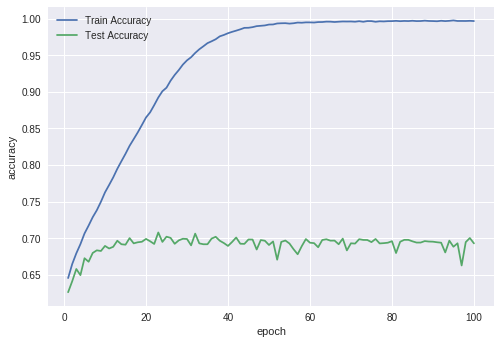

validation loss: 2.4678564037323
validation accuracy: 0.693


In [5]:
modelhistory = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(modelhistory.history)
plotaccuracy = plt.plot(range(1,epochs+1),modelhistory.history['acc'],range(1,epochs+1),modelhistory.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',modelhistory.history['val_loss'][-1])
print('validation accuracy:',modelhistory.history['val_acc'][-1])
